In [47]:
import pandas as pd
import datetime
import numpy as np

***El siguiente codigo permite obtener las tormentas registradas en una determinada estacion, a partir de los click registrados por el pluviometro. Esto lo realiza en 24 horas, y se utiliza para determinar los dias en que se producen las mayores tormentas.***

In [48]:
#lee los datos con pandas para la sheet_name de excel indicado
df_nucleo=pd.read_excel('Datos1.xlsx',sheet_name='Penco')
df_nucleo

,Fecha,Precipitación (mm)
0,08/03/22 20:00,0.0
1,08/03/22 20:01,0.0
2,08/03/22 20:02,0.0
3,08/03/22 20:03,0.0
4,08/03/22 20:04,0.0
...,...,...
85534,04/12/23 13:28,0.2
85535,04/12/23 13:28,0.2
85536,04/12/23 13:30,0.0
85537,04/12/23 13:30,0.0


In [49]:
#genera el dataframe sobre la base de las fechas
df_nucleo['fe']=pd.to_datetime(df_nucleo['Fecha'])

#entrega un nuevo formato por minuto a los datos y escribe una nueva columna
df_nucleo['fecha_hora_min']=pd.to_datetime(df_nucleo.fe.dt.strftime('%m/%d/%Y %H:%M'))

#agrupa los datos por minuto
df_g=df_nucleo.groupby(by='fecha_hora_min').sum()


In [50]:
#Se considera como un vector los indices de la precipitacion, los cuales son las fechas
precipitacion = df_g
dt_fechas = df_g.index
dias = np.array([dt_fecha.day for dt_fecha in dt_fechas])

#Crea un vector de zeros del largo de los dias que hay en dt_fechas, es donde
#se guardaran las sumas de la precipitacion por dia
precip_dia = np.zeros(len(dias))

#Busca el indice donde el vector dia cambia de dia
cambios_de_dia = np.where(np.roll(dias, 1) != dias)[0]
fech = []
precipi = []

# Sumar la precipitación correspondiente a cada día
for i in range(len(cambios_de_dia)):
    if i == len(cambios_de_dia) - 1: # si es igual al ultimo dia
        precip_dia[cambios_de_dia[i]:] = np.sum(precipitacion[cambios_de_dia[i]:])
    else: # si es distinto al ultimo dia
        #Aqui se realiza la suma de la precipitacion desde el cambio de dia i hasta el i+1 sin tomar en cuanta el i+1
        precip_dia[cambios_de_dia[i]:cambios_de_dia[i+1]] = np.sum(precipitacion[cambios_de_dia[i]:cambios_de_dia[i+1]])
    
    
    # Agregar fecha y precipitación a las listas correspondientes, GUARDA LOS VECTORES PARA TRABAJARLOS LUEGO
    fechitas = dt_fechas[cambios_de_dia[i]].date().strftime('%m-%d-%Y')
    precipp = precip_dia[cambios_de_dia[i]]
    fech.append(fechitas)
    precipi.append(precipp)

# Imprimir la precipitación correspondiente a cada día
#for i in range(len(cambios_de_dia)):
    #print("El día", dt_fechas[cambios_de_dia[i]].date(), "se ha registrado una precipitación de", precip_dia[cambios_de_dia[i]]



In [51]:
maxindice = np.argmax(precip_dia[cambios_de_dia])
max_precip_fecha = dt_fechas[cambios_de_dia[maxindice]].date().strftime('%m-%d-%Y')
print('La fecha con mayor preciptiación fue el', max_precip_fecha, 'con',precip_dia.max(),'mm de agua precipitada.')
# LA FECHA: MES/DIA/AÑO


La fecha con mayor preciptiación fue el 08-16-2022 con 30.8 mm de agua precipitada.


In [52]:
Mat = pd.DataFrame({'Fechas':fech,'Precipitación diara (mm)': precipi})
#genera el dataframe sobre la base de las fechas
Mat['fe']=pd.to_datetime(Mat['Fechas'])

#entrega un nuevo formato por minuto a los datos y escribe una nueva columna
Mat['fecha_hora_min']=pd.to_datetime(Mat.fe.dt.strftime('%m/%d/%Y %H:%M'))

#agrupa los datos por minuto
df_g= Mat.groupby(by='fecha_hora_min').sum()
df_g.to_excel('Fechastormentas.xlsx')

In [53]:
#Aqui se genera la precipitacion acumulada mensual 
precipitacion = df_g #datos (precipitacion)
fechas = df_g.index #indice (fechas)

# crea una columna con el año y el mes correspondiente a cada fecha
mesaño = pd.DataFrame({'anio_mes': [dt_fecha.strftime('%Y-%m') for dt_fecha in fechas]}, index=fechas)

# usa la columna de año y mes como índice para agrupar y sumar la precipitación por mes
precip_mensual = precipitacion.groupby(mesaño['anio_mes']).sum()


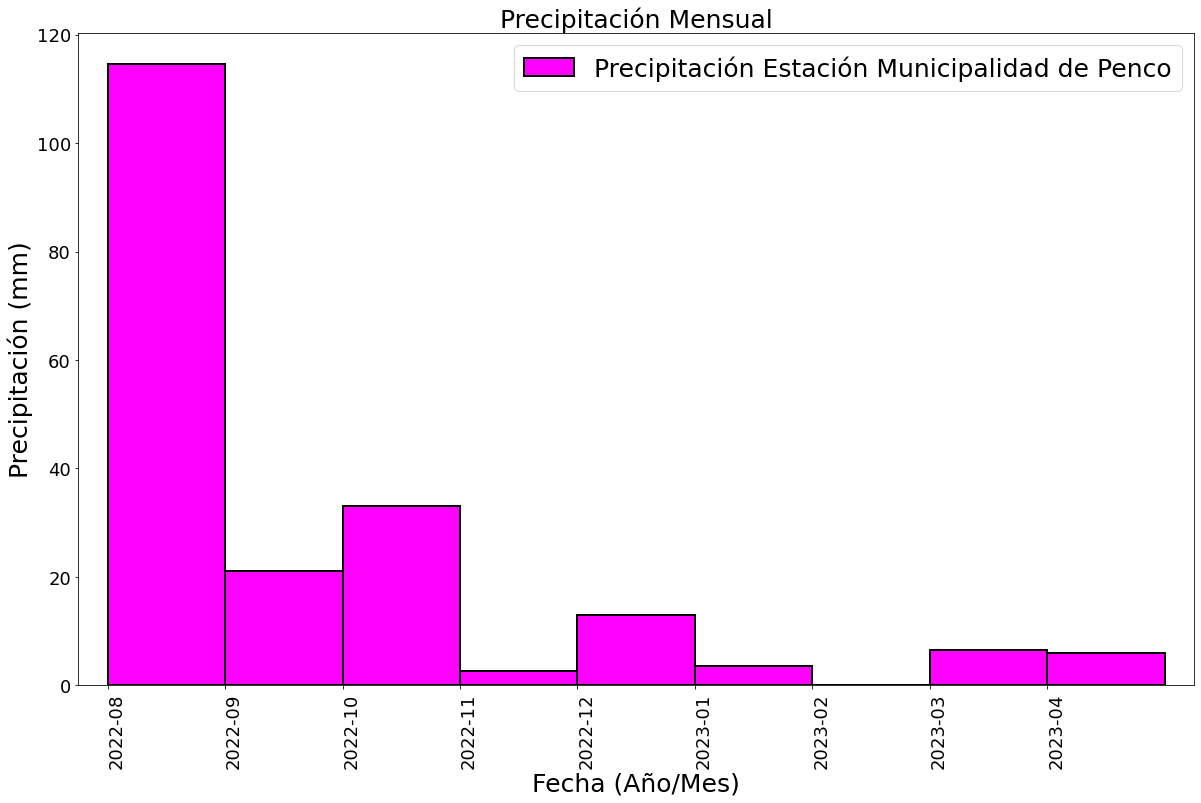

In [54]:
import matplotlib.pyplot as plt

# crea la figura y el eje
fig, ax = plt.subplots()

# Define el tamaño de la figura
fig.set_size_inches(20, 12)


# grafica los datos en barras

precip_mensual.plot.bar(ax=ax, color='magenta', width=1, edgecolor='k',linewidth=2, align='edge',alpha = 1)
ax.set_xticklabels(precip_mensual.index, rotation=90, ha='left')

# personaliza los ejes y la leyenda
ax.legend(['Precipitación Estación Municipalidad de Penco'], fontsize=25)
ax.set_xlabel('Fecha (Año/Mes)', fontsize=25)
ax.set_ylabel('Precipitación (mm)', fontsize=25)
ax.set_title('Precipitación Mensual', fontsize=25)
ax.tick_params(axis='both', labelsize=18)


# muestra la gráfica
plt.savefig('Precipitación mensual en Penco.png',dpi=900)



La fecha con mayor preciptiación fue el 08-16-2022 con 30.8 mm de agua precipitada.


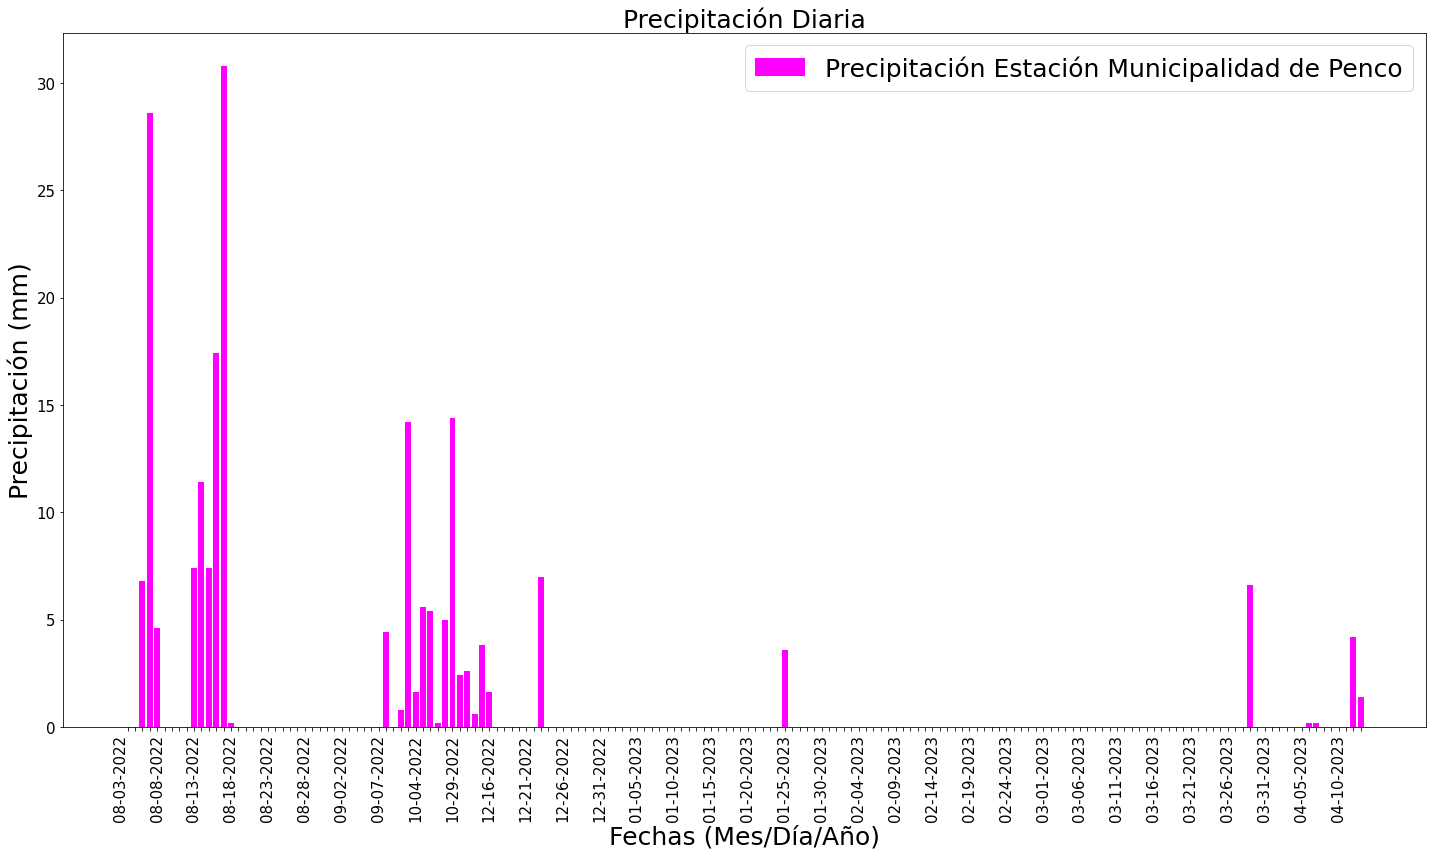

In [55]:

# Crea la figura con el tamaño deseado
fig = plt.figure(figsize=(20, 12))

# Crea el gráfico de barras
plt.bar(range(len(precipi)), precipi, color='magenta')

# Modifica las etiquetas del eje x para mostrar solo cada 10 días
fech_10d = [fech[i] if i % 5 == 0 else "" for i in range(len(fech))]
plt.xticks(range(len(fech)), fech_10d, rotation=90, ha="right")

# Agrega etiquetas a los ejes y título al gráfico
plt.legend(['Precipitación Estación Municipalidad de Penco'], fontsize=25)

plt.xlabel('Fechas (Mes/Día/Año)', fontsize = 25)


plt.ylabel('Precipitación (mm)', fontsize = 25)
plt.title('Precipitación Diaria', fontsize = 25)
plt.tick_params(axis='both', labelsize=15)
# Muestra el gráfico
plt.tight_layout()

plt.savefig('Precipitación Diaria en Penco.png',dpi=900)

maxindice = np.argmax(precip_dia[cambios_de_dia])
max_precip_fecha = dt_fechas[cambios_de_dia[maxindice]].date().strftime('%m-%d-%Y')
print('La fecha con mayor preciptiación fue el', max_precip_fecha, 'con',np.round(precip_dia.max(),4),'mm de agua precipitada.')
# LA FECHA: MES/DIA/AÑO
